# Haar Wavelet Explication

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Example 2.1.A** *(from the texbook)* Find the first level Haar transform of $f = (2,2,2,4,4,4)$.
A picture of the graph of $f$:

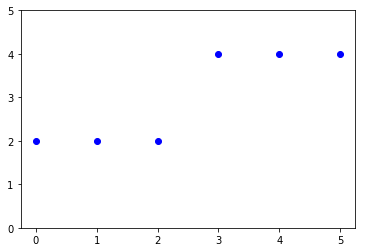

In [2]:
f = [2,2,2,4,4,4]
n = range(0,len(f))
plt.ylim(0,5)
plt.plot(n,f,"bo")

A signal can be decomposed into averages and perturbations, much like the average velocities and deviations of turbulent flow.

![steady.png](https://achcello.github.io/steady.png)

The first component of the decomposition is generally referred to as the averages or trend, $\mathbf{a}^n$ where $n$ is the number of transforms done on the signal. $\mathbf{a}^1$ is the *first trend*. Similarly, $\mathbf{d}^1$ would be the *first fluctuation*.

$$a_m = \frac{f_{2m-1} + f_{2m}}{2} \sqrt{2}$$
$$d_m = \frac{f_{2m-1} - f_{2m}}{\sqrt{2}}$$

In [3]:
# here we calculate the first trend and perturbation of the example sequence

def trend(signal):
    output = []
    if len(signal) % 2 != 0:
        signal.append(0)
    for index in range(len(signal) // 2):
        output.append( (signal[2*index] + signal[2*index + 1]) / np.sqrt(2) )
    return output

print(f)
print(trend(f))

def perturb(signal):
    output = []
    if len(signal) % 2 != 0:
        signal.append(0)
    for index in range(len(signal) // 2):
        output.append( (signal[2*index] - signal[2*index + 1]) / np.sqrt(2) )
    return output

print(perturb(f))

[2, 2, 2, 4, 4, 4]
[2.82842712474619, 4.242640687119285, 5.65685424949238]
[0.0, -1.414213562373095, 0.0]


Given that the first level Haar transform is $\mathbf{f} \rightarrow ( \mathbf{a}^1 |\, \mathbf{d}^1)$, our answer is

[2.82842712474619, 4.242640687119285, 5.65685424949238, 0.0, -1.414213562373095, 0.0]


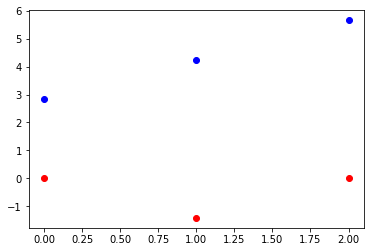

In [4]:
H_1 = trend(f) + perturb(f)
print(H_1)
plt.plot(range(3), trend(f),"bo")
plt.plot(range(3), perturb(f),"ro")

### Compression

We can try something a little bit more interesting by compressing a signal.

Take, for example, the signal defined by this function:

$$g(x)=20x^2(1-x)^4 \cos(12 \pi x)$$

We need to define the inverse tranform so we can reconstruct a signal.

In [5]:
# inverse for the trend
def trendInverse(signal):
    output = []
    for value in signal:
        output.append(value/np.sqrt(2))
        output.append(value/np.sqrt(2))
    return output

# inverse for the perturbations
def perturbInverse(signal):
    output = []
    for value in signal:
        output.append(value/np.sqrt(2))
        output.append(value/-np.sqrt(2))
    return output

def inverseTransform(trend, perturb):
    return [sum(x) for x in zip(trend, perturb)]

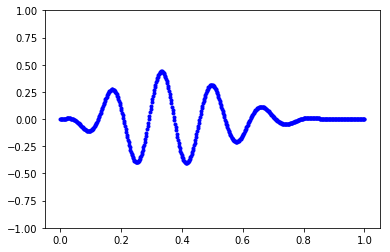

In [6]:
# define the signal

def g(x):
    return 20 * x**2 * (1-x)**4 * np.cos(12 * np.pi * x)

xspace = np.linspace(0,1,512)
gpoints = g(xspace)
gl = gpoints.tolist()
plt.ylim(-1,1)
plt.plot(xspace,gpoints,"b.")

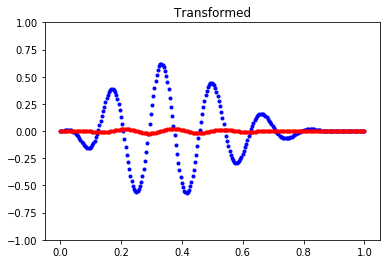

In [7]:
# we have a space of 2^10 samples to work with, so we can perform up to a
# 10-level Haar transform. Let's do one level and see how it works.

# First we'll see if we can recover the signal.
trend_g = trend(gl)
perturb_g = perturb(gl)
plt.title("Transformed")
plt.ylim(-1,1)
plt.plot(np.linspace(0,1,256),trend_g,"b.",np.linspace(0,1,256),perturb_g,"r.")

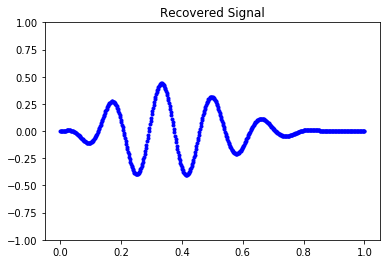

In [8]:
recovered = inverseTransform(trendInverse(trend_g), perturbInverse(perturb_g))
plt.title("Recovered Signal")
plt.ylim(-1,1)
plt.plot(np.linspace(0,1,512),recovered,"b.")

The actual compression happens by setting values in the transform to zero when under a certain threshold. Let's set all the values in the perturbation to zero.

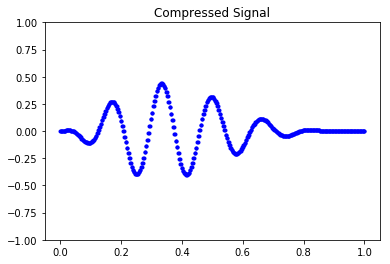

In [9]:
perturb_g = [0 for _ in perturb_g] # so now we don't need to store/transmit these
compressed = inverseTransform(trendInverse(trend_g), perturbInverse(perturb_g))
plt.title("Compressed Signal")
plt.ylim(-1,1)
plt.plot(np.linspace(0,1,512),compressed,"b.")

This signal looks the same, but it requires only half the amount of data to store or transmit. Further compression can be acheived by performing higher levels of the transform and being more intelligent about which values to supress.